# 订单地理分布图

In [50]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
import numpy as np
import pandas as pd

In [40]:
# 读取数据
df = pd.read_excel('test_data.xls')

In [48]:
# 订单发生地点
loc = df[['longitude', 'latitude']]

In [67]:
# 简单统计描述
loc.describe()

,longitude,latitude
count,5750.000000,5750.000000
mean,121.462083,31.224558
std,0.090808,0.071018
min,120.927258,30.731911
25%,121.412006,31.193259
50%,121.457926,31.224399
75%,121.518633,31.262430
max,121.871930,31.485417


In [68]:
# 过滤异常值
loc = loc[(loc.latitude < 32)]

In [73]:
# 找出地理范围
lllon = loc.longitude.min()
urlon = loc.longitude.max()
lllat = loc.latitude.min()
urlat = loc.latitude.max()

lllon, urlon, lllat, urlat

(120.92725800000001, 121.87192985761999, 30.731911, 31.485416956827002)

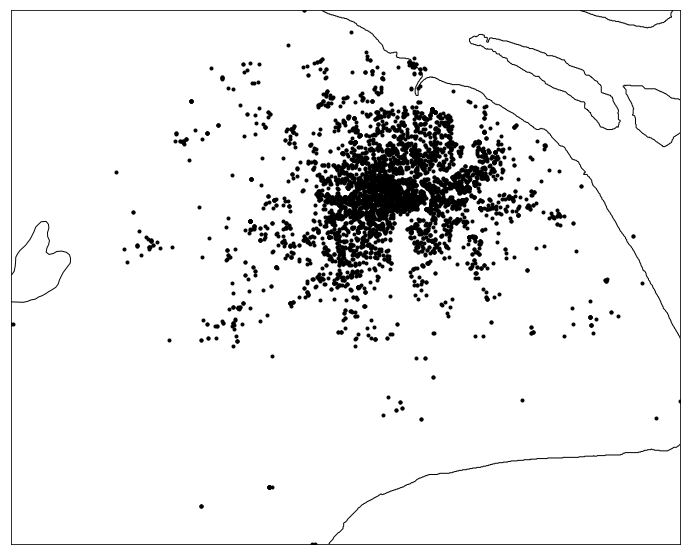

In [77]:
from mpl_toolkits.basemap import Basemap

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(1,1,1)

m = Basemap(ax=ax,
            lon_0=(lllon+urlon)/2,
            lat_0=(lllat+urlat)/2,
            llcrnrlat=lllat,
            urcrnrlat=urlat,
            llcrnrlon=lllon,
            urcrnrlon=urlon,
            resolution='f')
m.drawcoastlines()
m.drawstates()
#m.drawcountries()

# 画出订单分布图
x, y = m(loc.longitude.values, loc.latitude.values)
m.plot(x, y, 'k.')